In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import joblib

In [2]:
df = pd.read_csv('Preprocesses_result.csv')

In [3]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month
0,1,1,13.4,22.900000,0.6,5.468232,7.611178,1,44.00000,1,...,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,0,2008,12
1,2,1,7.4,25.100000,0.0,5.468232,7.611178,2,44.00000,2,...,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,0,2008,12
2,3,1,12.9,25.700000,0.0,5.468232,7.611178,3,46.00000,1,...,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,0,2008,12
3,4,1,9.2,28.000000,0.0,5.468232,7.611178,4,24.00000,3,...,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,0,2008,12
4,5,1,17.5,32.300000,1.0,5.468232,7.611178,1,41.00000,4,...,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0,2008,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,21,49,2.8,23.400000,0.0,5.468232,7.611178,15,31.00000,3,...,1024.6,1020.3,4.447461,4.50993,10.1,22.4,0,0,2017,6
145456,22,49,3.6,25.300000,0.0,5.468232,7.611178,5,22.00000,3,...,1023.5,1019.1,4.447461,4.50993,10.9,24.5,0,0,2017,6
145457,23,49,5.4,26.900000,0.0,5.468232,7.611178,6,37.00000,3,...,1021.0,1016.8,4.447461,4.50993,12.5,26.1,0,0,2017,6
145458,24,49,7.8,27.000000,0.0,5.468232,7.611178,13,28.00000,6,...,1019.4,1016.5,3.000000,2.00000,15.1,26.0,0,0,2017,6


In [4]:
X = df.drop(columns=['RainTomorrow','Date']) 
y = df['RainTomorrow']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
xgb_classifier = XGBClassifier(n_estimators=2000,max_depth=6,learning_rate=0.1,objective='binary:logistic',random_state=42)

In [7]:
xgb_classifier.fit(X_train, y_train)

[00:16:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "verbose" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=2000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [13]:
y_pred = xgb_classifier.predict(X_test)

In [14]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC AUC: {roc_auc:.2f}')

Accuracy: 0.86
ROC AUC: 0.76


In [15]:
fpr, tpr, _ = roc_curve(y_test, y_pred)

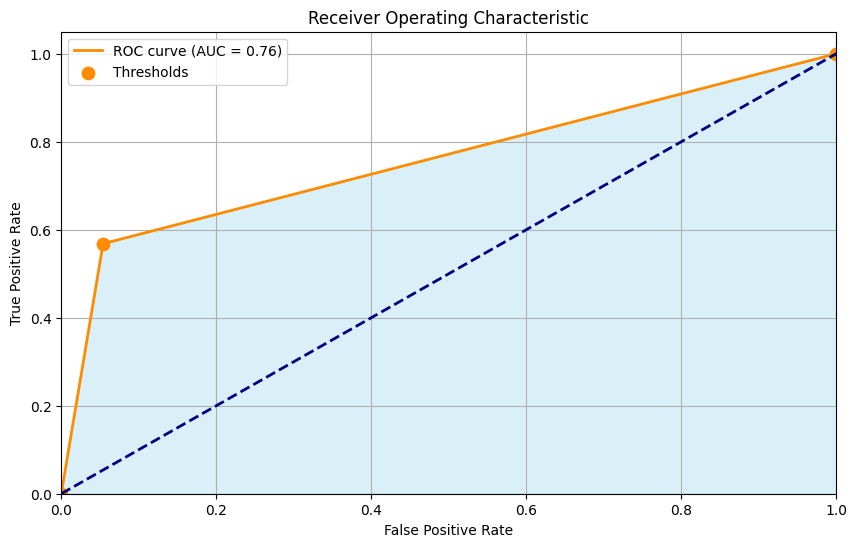

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')

plt.grid(True)
plt.fill_between(fpr, tpr, color='skyblue', alpha=0.3)
plt.scatter(fpr, tpr, color='darkorange', marker='o', label='Thresholds', s=80)
plt.legend()

plt.show()


In [12]:
joblib.dump(xgb_classifier, "XGBBoost_Classifier.pkl")

['XGBBoost_Classifier.pkl']